In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
pd.set_option('max_columns',None)



In [2]:
data = pd.read_csv('pulsar_data_train.csv')

In [3]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [4]:
data.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [5]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [6]:
data['target_class'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12523    0.0
12524    0.0
12525    0.0
12526    0.0
12527    0.0
Name: target_class, Length: 12528, dtype: float64>

In [7]:
result = data['target_class'].value_counts()

In [8]:
result

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn

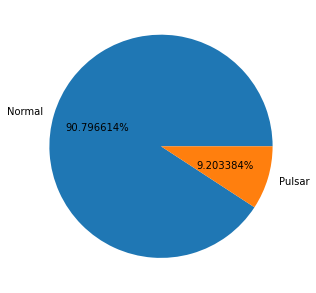

In [10]:
plt.figure(figsize = (5,6))
plt.pie(result, autopct = '%2f%%',labels = ['Normal','Pulsar'])
plt.show()

In [11]:
# this are class in-blanceing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
def preprocessing_inputs(df):
    df = df.copy()
    #  Fill missing values
    for column in df.columns:
        df[column] = df[column].fillna(df[column].mean())
    # split df in to X,y
    y = df['target_class']
    X = df.drop(['target_class'],axis = 'columns')
    # train_test_split
    X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size = 0.2)
    # scaler data
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train),index = X_train.index,columns = X_train.columns)
    X_test  = pd.DataFrame(scaler.transform(X_test),index = X_test.index,columns = X_test.columns)
    return X_train,X_test,y_train,y_test

In [13]:
X_train,X_test,y_train,y_test = preprocessing_inputs(data)

In [14]:
X_train

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
1416,-3.150327,-2.448817,4.895408,5.029303,0.390823,1.299603,-1.275432,-0.948974
7541,1.389793,0.742965,-0.617440,-0.339699,-0.378516,-0.741420,0.972088,0.923769
5079,0.158475,0.547446,-0.373182,-0.348639,-0.387213,-0.004462,0.889165,0.785930
2406,-0.365503,-0.389819,-0.311826,-0.237524,-0.235272,0.118363,-0.597045,-0.689749
9160,-0.231284,0.841119,-0.155192,-0.312452,-0.310220,-0.151914,-0.167400,-0.425461
...,...,...,...,...,...,...,...,...
2960,-0.495730,-0.391372,-0.156986,-0.230416,-0.359076,-0.682295,0.297816,0.203729
1877,1.015391,0.619753,-0.667734,-0.283654,-0.254002,0.073188,-0.489052,-0.638809
11504,0.480356,1.262017,0.001155,-0.334039,-0.341540,-0.004462,0.210915,0.002293
10454,0.278566,0.374081,-0.485046,-0.281570,-0.267474,-0.113649,-0.432055,-0.582511


In [15]:
X_test

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
2083,0.303751,0.535437,-0.285639,-0.337144,-0.293991,-0.316736,-0.309618,-0.465680
6310,-1.169591,-1.679960,0.001155,0.297119,-0.335714,-0.414962,0.041859,-0.228097
5639,0.628704,-0.729815,-0.528999,-0.236619,-0.319968,-0.247660,-0.232793,-0.476730
11602,0.277030,0.829335,-0.495624,-0.348519,-0.365073,-0.771723,0.768356,0.875396
7091,-0.239883,-0.206632,-0.220645,-0.215542,-0.340261,-0.306355,-0.010228,-0.330853
...,...,...,...,...,...,...,...,...
2311,0.286245,1.124148,-0.197153,-0.280686,-0.372747,-0.727618,0.802601,0.738318
5291,1.133947,-0.331978,-0.352476,-0.302950,0.471938,1.631416,-1.356304,-0.978057
8069,-1.117378,-1.368107,0.370288,0.173650,-0.400600,-0.746302,1.900050,1.956878
5086,-1.227333,-0.623605,0.186369,-0.080021,-0.348731,-0.669490,0.247681,0.169882


In [16]:
y_train

1416     1.0
7541     0.0
5079     0.0
2406     0.0
9160     0.0
        ... 
2960     0.0
1877     0.0
11504    0.0
10454    0.0
12308    0.0
Name: target_class, Length: 10022, dtype: float64

In [17]:
y_test

2083     0.0
6310     0.0
5639     0.0
11602    0.0
7091     0.0
        ... 
2311     0.0
5291     0.0
8069     0.0
5086     0.0
1943     0.0
Name: target_class, Length: 2506, dtype: float64

In [18]:
from  sklearn.linear_model import LogisticRegression

In [19]:
rog = LogisticRegression()

In [20]:
rog.fit(X_train,y_train)

LogisticRegression()

In [21]:
rog.score(X_train,y_train)

0.976052684094991

In [22]:
y_pred = rog.predict(X_test)

In [23]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
cm = confusion_matrix(y_test,y_pred)

In [26]:
cm

array([[2245,    8],
       [  55,  198]], dtype=int64)

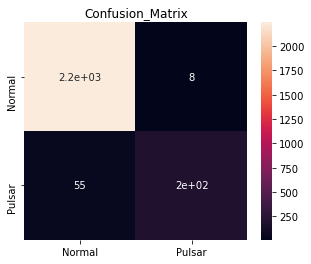

In [27]:
plt.figure(figsize = (5,4))
plt.xlabel('Prediction')
plt.ylabel('Test')
plt.title('Confusion_Matrix')

sn.heatmap(cm,annot = True)
plt.xticks(np.arange(2) + 0.5,['Normal','Pulsar'])
plt.yticks(np.arange(2) + 0.5,['Normal','Pulsar'])
plt.show()

In [29]:
clr = classification_report(y_test,y_pred,target_names = ['Normal','Pulsar'])

In [30]:
clr

'              precision    recall  f1-score   support\n\n      Normal       0.98      1.00      0.99      2253\n      Pulsar       0.96      0.78      0.86       253\n\n    accuracy                           0.97      2506\n   macro avg       0.97      0.89      0.92      2506\nweighted avg       0.97      0.97      0.97      2506\n'

In [31]:
print(clr)

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99      2253
      Pulsar       0.96      0.78      0.86       253

    accuracy                           0.97      2506
   macro avg       0.97      0.89      0.92      2506
weighted avg       0.97      0.97      0.97      2506



In [32]:
print("Classification_Report :\n----------------------\n",clr)

Classification_Report :
----------------------
               precision    recall  f1-score   support

      Normal       0.98      1.00      0.99      2253
      Pulsar       0.96      0.78      0.86       253

    accuracy                           0.97      2506
   macro avg       0.97      0.89      0.92      2506
weighted avg       0.97      0.97      0.97      2506



In [33]:
#

In [34]:
rog = LogisticRegression(
     class_weight = {0:1.0,
                    1:1.0
                    }
)

In [35]:
rog.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1.0, 1: 1.0})

In [36]:
rog.score(X_test,y_test)

0.9748603351955307

In [37]:
y1_pred = rog.predict(X_test)
y1_pred
cm = confusion_matrix(y_test,y_pred)
cm

array([[2245,    8],
       [  55,  198]], dtype=int64)

In [38]:
#

In [39]:
rog = LogisticRegression(
    class_weight = {
                      0:1.0,
                      1:2.0
    } 
)

In [40]:
rog.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1.0, 1: 2.0})

In [41]:
rog.score(X_test,y_test)

0.9748603351955307

In [42]:
y2_pred = rog.predict(X_test)
y2_pred
cm = confusion_matrix(y_test,y2_pred)
cm
clr= classification_report(y_test,y2_pred)
print("Classification_Report :\n--------------\n",clr)

Classification_Report :
--------------
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2253
         1.0       0.93      0.81      0.87       253

    accuracy                           0.97      2506
   macro avg       0.96      0.90      0.93      2506
weighted avg       0.97      0.97      0.97      2506



In [43]:
#

In [52]:
rog = LogisticRegression(
        class_weight  = {
            0:1.0,
            1:8.0
        }
)


In [53]:
rog.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1.0, 1: 8.0})

In [54]:
rog.score(X_test,y_test)

0.9712689545091779

In [55]:
y3_pred = rog.predict(X_test)
y3_pred
cm = confusion_matrix(y_test,y3_pred)
cm

array([[2214,   39],
       [  33,  220]], dtype=int64)

In [56]:
clr = classification_report(y_test,y3_pred)
clr

'              precision    recall  f1-score   support\n\n         0.0       0.99      0.98      0.98      2253\n         1.0       0.85      0.87      0.86       253\n\n    accuracy                           0.97      2506\n   macro avg       0.92      0.93      0.92      2506\nweighted avg       0.97      0.97      0.97      2506\n'

In [57]:
print('Classification_Report\n--------------\n',clr)

Classification_Report
--------------
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2253
         1.0       0.85      0.87      0.86       253

    accuracy                           0.97      2506
   macro avg       0.92      0.93      0.92      2506
weighted avg       0.97      0.97      0.97      2506

